In [75]:
import os
import sys

sys.path.append("LAVIS")

from lavis.models import load_model_and_preprocess
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
url = "/home/cho092871/Desktop/Networks/DualFSAR/test_img.png"
# response = requests.get(url)
# raw_image = Image.open(BytesIO(response.content)).convert("RGB")
raw_image = Image.open(url).convert("RGB")
raw_image = raw_image.resize((224, 224))
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="aokvqa", is_eval=True, device=device)

WARNING - 2024-12-18 13:37:55,401 - warnings - /home/cho092871/anaconda3/envs/lavis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(

WARNING - 2024-12-18 13:37:55,624 - warnings - /home/cho092871/Desktop/Networks/DualFSAR/LAVIS/lavis/models/base_model.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects 

In [76]:
image

tensor([[[[-1.6463, -1.3835, -1.1207,  ...,  0.0763,  0.0763,  0.0763],
          [-1.6463, -1.6463, -1.6609,  ...,  0.0763,  0.0763,  0.0763],
          [-1.6609, -1.6609, -1.6609,  ...,  0.0763,  0.0763,  0.0763],
          ...,
          [-0.3178, -0.3178, -0.3178,  ..., -0.5222, -0.5514, -0.5806],
          [-0.3324, -0.3324, -0.3324,  ..., -0.5076, -0.5368, -0.5660],
          [-0.3324, -0.3324, -0.3324,  ..., -0.4930, -0.5222, -0.5514]],

         [[-1.6771, -1.3919, -1.1068,  ...,  0.1689,  0.1689,  0.1689],
          [-1.6771, -1.6771, -1.6921,  ...,  0.1689,  0.1689,  0.1689],
          [-1.6771, -1.6771, -1.6921,  ...,  0.1689,  0.1689,  0.1689],
          ...,
          [-1.6470, -1.6470, -1.6320,  ..., -0.8816, -0.9117, -0.9417],
          [-1.6470, -1.6470, -1.6320,  ..., -0.8816, -0.9117, -0.9417],
          [-1.6470, -1.6470, -1.6320,  ..., -0.8816, -0.9117, -0.9417]],

         [[-1.4802, -1.1958, -0.9114,  ...,  0.3399,  0.3399,  0.3399],
          [-1.4802, -1.4802, -

In [80]:
# ask a random question.
question = "what kind of the object exist?"
image = vis_processors["train"](raw_image).unsqueeze(0).to(device)
question = txt_processors["train"](question)
model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")

# ['singapore']

BERT embedding :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT multimodal Encoder :  torch.Size([1, 9, 768])
BERT embedding :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768]

['boxing ring']

In [65]:
image.shape

torch.Size([1, 3, 480, 480])

In [57]:
model.forward_encoder(samples={"image": image, "text_input": question})

BERT embedding :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])
BERT multimodal Encoder :  torch.Size([1, 6, 768])


(BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.1924, -0.0338, -0.1314,  ...,  0.0703, -0.0464,  0.0075],
          [-0.1867,  0.0913, -0.0839,  ...,  0.0351,  0.0050,  0.0411],
          [-0.0873,  0.0372, -0.0543,  ...,  0.1085,  0.0115, -0.0044],
          [-0.1971,  0.1002, -0.0992,  ...,  0.0643,  0.0425, -0.0064],
          [-0.0643,  0.0744, -0.1095,  ..., -0.0302,  0.0172, -0.0617],
          [ 0.0047, -0.0254,  0.0549,  ..., -0.0070, -0.0049, -0.0153]]],
        device='cuda:0', grad_fn=<NativeLayerNormBackward0>), pooler_output=None, hidden_states=None, past_key_values=None, attentions=None, cross_attentions=None),
 tensor([[[-0.3694, -0.5190, -0.2732,  ..., -0.6431, -0.1756, -0.4619],
          [-0.6105, -0.7452, -0.1045,  ..., -0.4395,  1.3749,  0.1316],
          [-0.3557, -0.8355, -0.0757,  ...,  0.3962,  0.5633,  0.2764],
          ...,
          [-0.2261, -0.8706,  0.6033,  ...,  0.3101,  0.1024,  0.0591],
          [-0.5440, -0.6181,  0.639

In [58]:
question

'a place of b'

In [59]:
image.shape

torch.Size([1, 3, 480, 480])

In [60]:
# ask a random question.
question = "a action of"
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)
model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")
# ['singapore']

BERT embedding :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT multimodal Encoder :  torch.Size([1, 5, 768])
BERT embedding :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768])
BERT multimodal Encoder :  torch.Size([3, 1, 768]

['boxers']

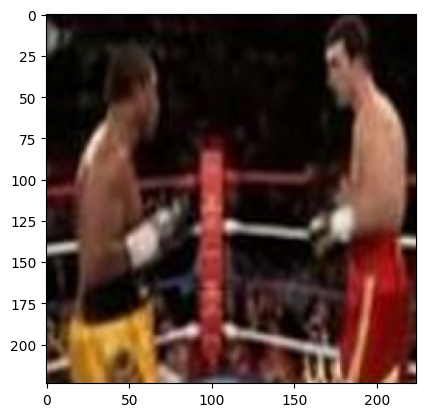

In [24]:
plt.imshow(raw_image)

In [33]:
question = ["a action of", "at the"]
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_feature_extractor", model_type="base", is_eval=True, device=device)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = [txt_processors["eval"](q) for q in question]
out = model.extract_features(samples={"image": image, "text_input": 'at the'})

WARNING - 2024-12-17 18:10:39,874 - warnings - /home/cho092871/anaconda3/envs/lavis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(

WARNING - 2024-12-17 18:10:40,100 - warnings - /home/cho092871/Desktop/Networks/DualFSAR/LAVIS/lavis/models/blip_models/blip.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary ob

BERT embedding :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])
BERT multimodal Encoder :  torch.Size([1, 4, 768])


In [34]:
out['multimodal_embeds'].shape

torch.Size([1, 4, 768])

In [50]:
text = model.extract_features(samples={"image": image, "text_input": 'a'}, mode='text')

BERT embedding :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])
BERT text Encoder :  torch.Size([1, 3, 768])


In [51]:
text.keys()

odict_keys(['text_embeds', 'text_embeds_proj'])

In [62]:
similarity = (out.multimodal_embeds @ text.text_embeds[:,0,:].t()).max()
print(similarity)

tensor(1.5567, device='cuda:0', grad_fn=<MaxBackward1>)


In [61]:
question = ["a action of", "a action of", "What is the main idea of this topic?"]
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_feature_extractor", model_type="base", is_eval=True, device=device)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
image = image.repeat(2, 1, 1, 1)
question = [txt_processors["eval"](q) for q in question]
out = model.extract_features(samples={"image": image, "text_input": question})

INFO - 2024-12-18 13:34:35,829 - blip - Missing keys []
INFO - 2024-12-18 13:34:35,830 - blip - load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth


BERT embedding :  torch.Size([3, 11, 768])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [ ]:
out.keys()

odict_keys(['image_embeds', 'multimodal_embeds'])

In [14]:
out['image_embeds'].shape

torch.Size([2, 197, 768])

In [15]:
out['multimodal_embeds'].shape

torch.Size([2, 5, 768])

In [8]:
image.shape

torch.Size([2, 3, 224, 224])

In [10]:
out = model.extract_features(samples={"image": image, "text_input": question}, mode='text')

In [11]:
out.text_embeds_proj.shape

torch.Size([3, 11, 256])